In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Lung_cancer_dataset.zip"

Archive:  /content/drive/MyDrive/Lung_cancer_dataset.zip
   creating: Lung_cancer_dataset/Test/
   creating: Lung_cancer_dataset/Test/0/
  inflating: Lung_cancer_dataset/Test/0/Bengin case (102).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (113).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (114).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (115).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (116).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (117).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (118).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (119).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (120).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (16).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (25).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (40).jpg  
  inflating: Lung_cancer_dataset/Test/0/Bengin case (45).jpg  
  inflating: Lung_cancer_dataset/Te

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [4]:
data = []
labels = []
classes = 3
img_rows, img_cols, channels= 64,64,3
cur_path = os.getcwd()

In [5]:
#Retrieving the images and their labels 
img_path = r"/content/Lung_cancer_dataset/Train"
for i in range(classes):
    path = os.path.join(img_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((64,64))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [6]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(1037, 64, 64, 3) (1037,)


In [7]:
#Splitting training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(829, 64, 64, 3) (208, 64, 64, 3) (829,) (208,)


In [8]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)


In [9]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(img_rows, img_cols, channels)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        36928     
                                                        

In [11]:
epochs = 100
history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 10s 134ms/step - loss: 50.1994 - accuracy: 0.4234 - val_loss: 1.4940 - val_accuracy: 0.5673
Epoch 2/100
7/7 [==============================] - 0s 42ms/step - loss: 1.3114 - accuracy: 0.4741 - val_loss: 1.0105 - val_accuracy: 0.5385
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 0.9831 - accuracy: 0.5344 - val_loss: 1.0279 - val_accuracy: 0.6154
Epoch 4/100
7/7 [==============================] - 0s 35ms/step - loss: 0.9616 - accuracy: 0.5669 - val_loss: 0.9751 - val_accuracy: 0.6298
Epoch 5/100
7/7 [==============================] - 0s 36ms/step - loss: 0.9015 - accuracy: 0.5887 - val_loss: 0.8896 - val_accuracy: 0.6538
Epoch 6/100
7/7 [==============================] - 0s 36ms/step - loss: 0.8288 - accuracy: 0.6429 - val_loss: 0.8144 - val_accuracy: 0.6923
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 0.7393 - accuracy: 0.6972 - val_loss: 0.7264 - val_accuracy: 0.6827
Epoch 8/100
7/7 [

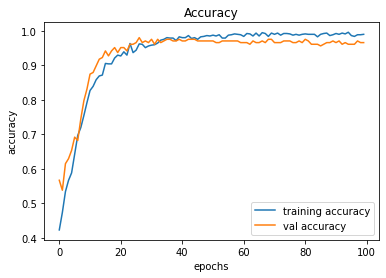

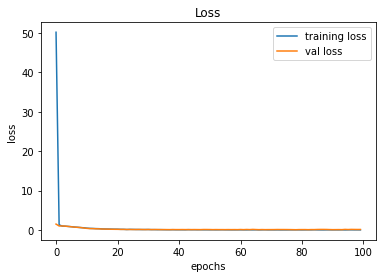

In [12]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
# #testing accuracy on test dataset
# from sklearn.metrics import accuracy_score

# y = pd.read_csv(r'/content/Test.csv')

# y_test = y["ClassId"].values
# imgs = y["Path"].values

# data=[]
# s = "/content"
# for img in imgs:
#     p = os.path.join(s, img)
#     image = Image.open(img)
#     image = image.resize((32,32))
#     data.append(np.array(image))

# x_test=np.array(data)
# y_test = np.array(y_test)
# y_test = to_categorical(y_test, 43)
#Retrieving the images and their labels 
x_test = []
y_test = []
img_path = r"/content/Lung_cancer_dataset/Test"
for i in range(classes):
    path = os.path.join(img_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((64,64))
            image = np.array(image)
            x_test.append(image)
            y_test.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)
temp = y_test
#one-hot encoding
y_test = to_categorical(y_test, 3)

In [14]:
print(y_test.shape, x_test.shape)

(60, 3) (60, 64, 64, 3)


In [15]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=8)
print("test loss, test acc:", results)

Evaluate on test data
8/8 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.8333
test loss, test acc: [0.6931803822517395, 0.8333333134651184]


In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = temp

index = [0 for i in range(3)]
for i in range(3):
    index[i] = i + 1;
columns = index

conf_mat = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(conf_mat,
                     index , 
                     columns )

2/2 [==============================] - 0s 97ms/step


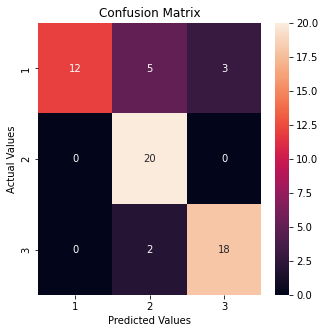

In [17]:
#Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()